In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import ipywidgets as widgets

import pydst
Dst = pydst.Dst(lang='en')

import pandas_datareader
import datetime


# Introduction to our Data Project

This project investigates different aspects of women's pay over time. This includes the following: women's share of men's pay, number of women employed full-time vs. part-time as well as women's employment frequency.
The purpose is to explore whether these the latter two aspects can explain the former. 
In order to do so, we conduct the following steps. First, we export data on women's share of men's pay from Danmarks Statistik. Then, we merge this data table with another exported data set from DST showing women's employment frequency and subsequently the share of women who are full-time and part-time employed. Finally, we perform relevant calculations and present our findings graphically.  

# Data: exporting and merging

## Women's share of men's pay

We export the table LIGELI1 directly from Danmarks Statisitk (DST) for the period 2004-2017.

In [7]:
gap = Dst.get_variables(table_id='LIGELI1')
gap.head(10)

,elimination,id,text,time,values
0,False,INDIKATOR,indicator,False,"[{'id': '4', 'text': 'Womens share of mens ear..."
1,False,Tid,time,True,"[{'id': '2004', 'text': '2004'}, {'id': '2005'..."


In [8]:
gap = Dst.get_data(table_id = 'LIGELI1', variables={'TID':['*']})
gap.head(10)

,TID,INDIKATOR,INDHOLD
0,2004,Womens share of mens earnings (per cent),84.0
1,2005,Womens share of mens earnings (per cent),83.8
2,2006,Womens share of mens earnings (per cent),83.9
3,2007,Womens share of mens earnings (per cent),84.0
4,2008,Womens share of mens earnings (per cent),84.4
5,2009,Womens share of mens earnings (per cent),84.6
6,2010,Womens share of mens earnings (per cent),84.7
7,2011,Womens share of mens earnings (per cent),84.8
8,2012,Womens share of mens earnings (per cent),85.3
9,2013,Womens share of mens earnings (per cent),85.7


We remove the the column 'indikator'. 

In [9]:
del gap['INDIKATOR']
gap.head(15)

,TID,INDHOLD
0,2004,84.0
1,2005,83.8
2,2006,83.9
3,2007,84.0
4,2008,84.4
5,2009,84.6
6,2010,84.7
7,2011,84.8
8,2012,85.3
9,2013,85.7


We rename each column.

In [10]:
gap.rename(columns = {'INDHOLD': 'Womens_share'}, inplace = True)
gap.rename(columns = {'TID': 'Year'}, inplace = True)
gap.head(10)

,Year,Womens_share
0,2004,84.0
1,2005,83.8
2,2006,83.9
3,2007,84.0
4,2008,84.4
5,2009,84.6
6,2010,84.7
7,2011,84.8
8,2012,85.3
9,2013,85.7


## Women's employment frequency

We export the table AKU121 directly from DST. 

In [11]:
#Træk nyt data med beskæftigelsesfrekvensen

empl = Dst.get_variables(table_id='AKU121')
empl.head(10)

,elimination,id,text,time,values
0,False,BESKSTATUS,employment status,False,"[{'id': 'BFK', 'text': 'Employment rate'}, {'i..."
1,True,ALDER,age,False,"[{'id': 'TOT', 'text': 'Age, total'}, {'id': '..."
2,True,KØN,sex,False,"[{'id': 'TOT', 'text': 'Total'}, {'id': 'M', '..."
3,False,Tid,time,True,"[{'id': '2000', 'text': '2000'}, {'id': '2001'..."


We identify each variable.

In [12]:
empl.loc[2]['values']

[{'id': 'TOT', 'text': 'Total'},
 {'id': 'M', 'text': 'Men'},
 {'id': 'K', 'text': 'Women'}]

In [13]:
empl.loc[0]['values']

[{'id': 'BFK', 'text': 'Employment rate'},
 {'id': 'LPCT', 'text': 'ILO-unemployment rate'},
 {'id': 'EFK', 'text': 'Economic activity rate'}]

We export the table again - this time only selecting the data that we need. 

In [14]:
empl = Dst.get_data(table_id = 'AKU121', variables={'TID':['*'], 'KØN':['K'], 'BESKSTATUS':['BFK']})
empl.head(10)

,TID,KØN,BESKSTATUS,ALDER,INDHOLD
0,2000,Women,Employment rate,"Age, total",72.1
1,2001,Women,Employment rate,"Age, total",72.4
2,2002,Women,Employment rate,"Age, total",72.1
3,2003,Women,Employment rate,"Age, total",70.9
4,2004,Women,Employment rate,"Age, total",72.0
5,2005,Women,Employment rate,"Age, total",72.4
6,2006,Women,Employment rate,"Age, total",73.9
7,2007,Women,Employment rate,"Age, total",73.2
8,2008,Women,Employment rate,"Age, total",74.1
9,2009,Women,Employment rate,"Age, total",72.7


We rename the columns and delete unnecessary columns.

In [15]:
#Rename columns and delete insignificant rows

empl.rename(columns = {'INDHOLD': 'Empl_freq_women', 'TID':'Year'}, inplace = True)
del empl['KØN']
del empl['BESKSTATUS']
del empl['ALDER']

empl.head(10)

,Year,Empl_freq_women
0,2000,72.1
1,2001,72.4
2,2002,72.1
3,2003,70.9
4,2004,72.0
5,2005,72.4
6,2006,73.9
7,2007,73.2
8,2008,74.1
9,2009,72.7


We merge the data from 2.1 with data from 2.2. We use the left-join method, so we still only have data for the period 2004-2017.

In [16]:
#Merge with previous data set
Merged=pd.merge(gap,empl,how='left',on=['Year'])
Merged.head(15)

,Year,Womens_share,Empl_freq_women
0,2004,84.0,72.0
1,2005,83.8,72.4
2,2006,83.9,73.9
3,2007,84.0,73.2
4,2008,84.4,74.1
5,2009,84.6,72.7
6,2010,84.7,71.1
7,2011,84.8,70.4
8,2012,85.3,70.0
9,2013,85.7,70.0


## Women working full- and part-time

We export the table AKU600 directly from DST.

In [17]:
#Træk ekstra data med info om deltid og fuldtid

parttime = Dst.get_variables(table_id='AKU600')
parttime.head(10)

,elimination,id,text,time,values
0,False,ARBAFTALE,working time arrangement,False,"[{'id': '1', 'text': 'Full-time job'}, {'id': ..."
1,True,ALDER,age,False,"[{'id': 'TOT', 'text': 'Age, total'}, {'id': '..."
2,True,KOEN,sex,False,"[{'id': 'TOT', 'text': 'Total'}, {'id': 'M', '..."
3,False,Tid,time,True,"[{'id': '2000', 'text': '2000'}, {'id': '2001'..."


We identify the variables.

In [18]:
parttime.loc[0]['values']

[{'id': '1', 'text': 'Full-time job'},
 {'id': '2', 'text': 'Part-time job'},
 {'id': '9', 'text': 'Not stated'}]

We export the data table again, however similar to previsouly, we select the relevant data. First for part-time employment, second for full-time employment. The same method applies for each.

In [19]:
#Træk data med deltidsansatte kvinder
parttime = Dst.get_data(table_id = 'AKU600', variables={'TID':['*'], 'KOEN':['K'], 'ARBAFTALE':['2']})
parttime.head(10)

,TID,KOEN,ARBAFTALE,ALDER,INDHOLD
0,2000,Women,Part-time job,"Age, total",424
1,2001,Women,Part-time job,"Age, total",394
2,2002,Women,Part-time job,"Age, total",375
3,2003,Women,Part-time job,"Age, total",397
4,2004,Women,Part-time job,"Age, total",421
5,2005,Women,Part-time job,"Age, total",413
6,2006,Women,Part-time job,"Age, total",453
7,2007,Women,Part-time job,"Age, total",452
8,2008,Women,Part-time job,"Age, total",464
9,2009,Women,Part-time job,"Age, total",477


We rename the columns and delete unnecessary ones. 

In [20]:
parttime.rename(columns = {'INDHOLD': 'Deltidsansatte', 'TID':'Year'}, inplace = True)
del parttime['KOEN']
del parttime['ARBAFTALE']
del parttime['ALDER']
parttime.head(10)

,Year,Deltidsansatte
0,2000,424
1,2001,394
2,2002,375
3,2003,397
4,2004,421
5,2005,413
6,2006,453
7,2007,452
8,2008,464
9,2009,477


The same method for full-time employment.

In [21]:
#Træk data med heltidsansatte kvinder
fulltime = Dst.get_data(table_id = 'AKU600', variables={'TID':['*'], 'KOEN':['K'], 'ARBAFTALE':['1']})
fulltime.head(10)

,TID,KOEN,ARBAFTALE,ALDER,INDHOLD
0,2000,Women,Full-time job,"Age, total",828
1,2001,Women,Full-time job,"Age, total",867
2,2002,Women,Full-time job,"Age, total",880
3,2003,Women,Full-time job,"Age, total",839
4,2004,Women,Full-time job,"Age, total",839
5,2005,Women,Full-time job,"Age, total",857
6,2006,Women,Full-time job,"Age, total",843
7,2007,Women,Full-time job,"Age, total",847
8,2008,Women,Full-time job,"Age, total",859
9,2009,Women,Full-time job,"Age, total",827


In [22]:
fulltime.rename(columns = {'INDHOLD': 'Heltidsansatte', 'TID':'Year'}, inplace = True)
del fulltime['KOEN']
del fulltime['ARBAFTALE']
del fulltime['ALDER']
fulltime.head(10)

,Year,Heltidsansatte
0,2000,828
1,2001,867
2,2002,880
3,2003,839
4,2004,839
5,2005,857
6,2006,843
7,2007,847
8,2008,859
9,2009,827


We merge the data tables for part- and full-time.

In [23]:
#merge deltid og fuldtid

Merged1=pd.merge(parttime,fulltime,how='left',on=['Year'])
Merged1.head(15)


,Year,Deltidsansatte,Heltidsansatte
0,2000,424,828
1,2001,394,867
2,2002,375,880
3,2003,397,839
4,2004,421,839
5,2005,413,857
6,2006,453,843
7,2007,452,847
8,2008,464,859
9,2009,477,827


## The full data table

We merge tables from 2.1, 2.2 and 2.3.

In [24]:
#Merge det hele
Alldata=pd.merge(Merged,Merged1,how='left',on=['Year'])
Alldata.head(15)

,Year,Womens_share,Empl_freq_women,Deltidsansatte,Heltidsansatte
0,2004,84.0,72.0,421,839
1,2005,83.8,72.4,413,857
2,2006,83.9,73.9,453,843
3,2007,84.0,73.2,452,847
4,2008,84.4,74.1,464,859
5,2009,84.6,72.7,477,827
6,2010,84.7,71.1,480,796
7,2011,84.8,70.4,463,799
8,2012,85.3,70.0,446,809
9,2013,85.7,70.0,440,817


# Data analysis

## How many women work part-time?

We calculate the fraction of women who are part-time employed, shown as a percentage of the total women employed in the given period.

In [25]:
#Fraction of parttime employed
Alldata['Total_employment']=Alldata['Deltidsansatte']+Alldata['Heltidsansatte']
Alldata['Parttime_share']=Alldata['Deltidsansatte']/Alldata['Total_employment']*100
Alldata.head(14)

,Year,Womens_share,Empl_freq_women,Deltidsansatte,Heltidsansatte,Total_employment,Parttime_share
0,2004,84.0,72.0,421,839,1260,33.412698
1,2005,83.8,72.4,413,857,1270,32.519685
2,2006,83.9,73.9,453,843,1296,34.953704
3,2007,84.0,73.2,452,847,1299,34.795997
4,2008,84.4,74.1,464,859,1323,35.071807
5,2009,84.6,72.7,477,827,1304,36.579755
6,2010,84.7,71.1,480,796,1276,37.617555
7,2011,84.8,70.4,463,799,1262,36.687797
8,2012,85.3,70.0,446,809,1255,35.537849
9,2013,85.7,70.0,440,817,1257,35.003978


## How has the share of women's income changed over time?

We can now calculate how the share of women's income has changed over time.

In [28]:
#Growth in womens share of men's income

Alldata['Change_in_incomeshare']=Alldata['Womens_share'].diff(1)
Alldata.head(10)

,Year,Womens_share,Empl_freq_women,Deltidsansatte,Heltidsansatte,Total_employment,Parttime_share,Change_in_incomeshare
0,2004,84.0,72.0,421,839,1260,33.412698,NaN
1,2005,83.8,72.4,413,857,1270,32.519685,-0.2
2,2006,83.9,73.9,453,843,1296,34.953704,0.1
3,2007,84.0,73.2,452,847,1299,34.795997,0.1
4,2008,84.4,74.1,464,859,1323,35.071807,0.4
5,2009,84.6,72.7,477,827,1304,36.579755,0.2
6,2010,84.7,71.1,480,796,1276,37.617555,0.1
7,2011,84.8,70.4,463,799,1262,36.687797,0.1
8,2012,85.3,70.0,446,809,1255,35.537849,0.5
9,2013,85.7,70.0,440,817,1257,35.003978,0.4


## Plotting the data

Text(0.5, 1.0, 'D. Women working part time as share of total employed women(%)')

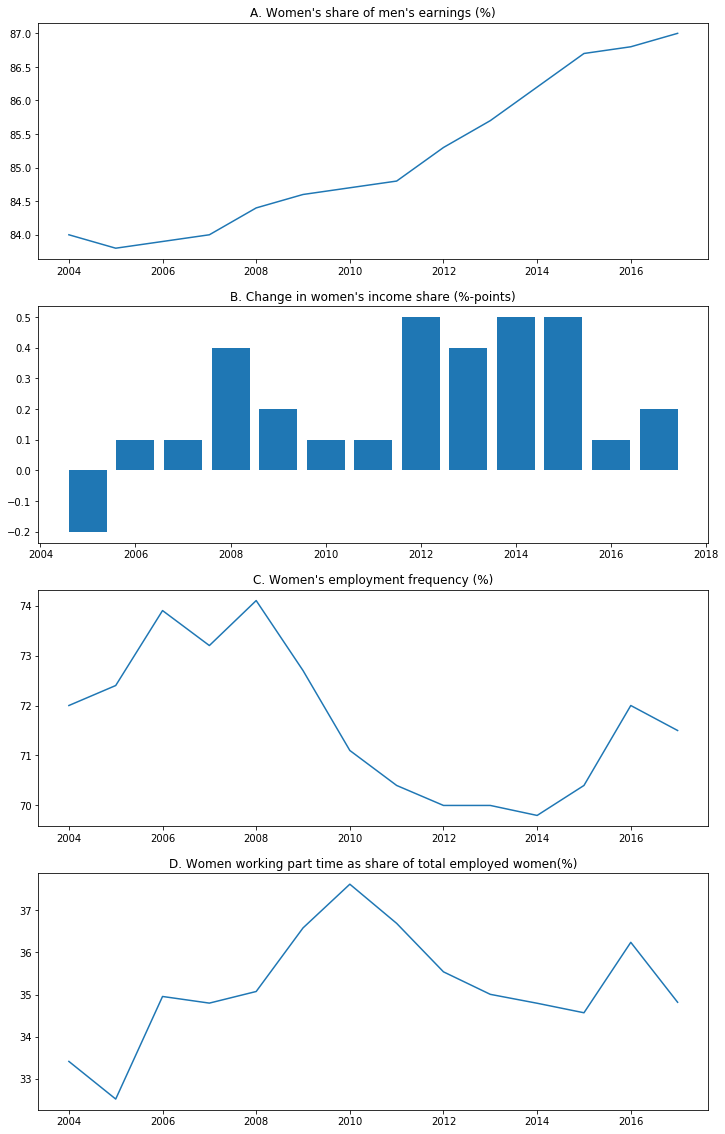

In [30]:
fig, axs=plt.subplots(4,1,figsize=(12,20),sharey=False)
axs[0].plot(Alldata['Year'],Alldata['Womens_share'])
axs[0].set_title('A. Women\'s share of men\'s earnings (%)')
axs[1].bar(Alldata['Year'],Alldata['Change_in_incomeshare'])
axs[1].set_title('B. Change in women\'s income share (%-points)')
axs[2].plot(Alldata['Year'],Alldata['Empl_freq_women'])
axs[2].set_title('C. Women\'s employment frequency (%)')
axs[3].plot(Alldata['Year'],Alldata['Parttime_share'])
axs[3].set_title('D. Women working part time as share of total employed women(%)')

(i) In figure A, we can see that the share of women's pay as a percentage of men's pay increases over time, and a mean of 85.1% from the table below. In other words, the gap between men and women's pay decreases over time. (ii) Furthermore, figure B shows that in periods of economic boom, the gap decreases the most significantly (2012-2015). Likewise in periods of economic recession, the gap increases the most significantly (2008-2011).
In order to explain why this happens, we will now analyse figure C and D. (iii) Figure C shows that from 2004-2017, the women's employment frequency has decreased slightly and ends at approx. the period mean of 71.7%. However, we also see that from 2004-2008, there an increase, followed by a dramatic decrease lasting up until 2014. Since then, women's employment freqency has increased again. We cannot be sure, but one explanation could be that there in general are fewer women active on the job market, yet the women who are, have experienced increases in their pay overall. (iv) Finally, figure D shows that an increasing share of women are working part-time from 2004-2017, again ending approx. at the mean level of 35.2%. Therefore, in relation to our previous conclusions, this raises the question of whether there is a disproportionate relationship between the marginal increase in hours worked and the marginal increase in hourly pay. If this is true, this could explain why the wage gap decreases at the same time as more and more women work part-time. 

Descriptive statistics of main variables can be seen below and are referred to in the analysis above

In [31]:
Alldata.describe()

,Year,Womens_share,Empl_freq_women,Deltidsansatte,Heltidsansatte,Total_employment,Parttime_share,Change_in_incomeshare
count,14.0000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,13.000000
mean,2010.5000,85.135714,71.678571,450.928571,830.500000,1281.428571,35.185374,0.230769
std,4.1833,1.149988,1.459283,20.005631,20.342264,23.276645,1.316251,0.213638
min,2004.0000,83.800000,69.800000,413.000000,796.000000,1255.000000,32.519685,-0.200000
25%,2007.2500,84.100000,70.400000,439.250000,817.500000,1260.500000,34.793744,0.100000
50%,2010.5000,84.750000,71.750000,452.500000,832.500000,1273.000000,34.978841,0.200000
75%,2013.7500,86.075000,72.625000,463.750000,846.000000,1302.750000,36.063361,0.400000
max,2017.0000,87.000000,74.100000,480.000000,859.000000,1323.000000,37.617555,0.500000
